In [1]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"time_series_covid19_confirmed_global.csv")
df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


## Data wrangling

In [5]:
df3 = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

df3.tail()

,Province/State,Country/Region,Lat,Long,variable,value
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,264276


In [6]:
df4 = df3.rename(columns={"variable": "Date", "value": "Cases", "Province/State": "State", "Country/Region": "Country" })

df4.tail()

,State,Country,Lat,Long,Date,Cases
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,264276


## Plot

Make a graph showing the evolution of the cumulative number of cases over time for: Belgium, China (all provinces except Hong Kong), China, Hong-Kong, France except Dom/Tom, Germany, Iran, Italy, Japan, Korea South, Netherlands without the colonies, Portugal, Spain, United Kingdom without the colonies, US.


Next, make a graph with the date on the x-axis and the cumulative number of cases at this date on the y-axis

In [16]:
# select countries asked
# still missing: hong kong, france, etc

sel_countries = df4.query('Country == "Belgium" or Country == "Germany" or Country == "Iran" or Country == "Italy" or Country == "Japan" or Country == "Korea South" or Country == "Spain" or Country == "Portugal" or Country == "US"')

sel_countries.head()

,State,Country,Lat,Long,Date,Cases
24,NaN,Belgium,50.833300,4.469936,1/22/20,0
135,NaN,Germany,51.165691,10.451526,1/22/20,0
150,NaN,Iran,32.427908,53.688046,1/22/20,0
154,NaN,Italy,41.871940,12.567380,1/22/20,0
156,NaN,Japan,36.204824,138.252924,1/22/20,2


In [7]:
# fix hong 
hongkong = df4.query('State == "Hong Kong"')

country = hongkong["State"].tolist()

hongkong = hongkong.drop(['State', 'Country'], axis=1)

hongkong["State"] = np.nan*len(country)

hongkong["Country"] = country


hongkong = hongkong.reindex(columns=['State', 'Country', 'Lat', 'Long', 'Date', 'Cases'])

hongkong.head()


,State,Country,Lat,Long,Date,Cases
71,NaN,Hong Kong,22.3,114.2,1/22/20,0
360,NaN,Hong Kong,22.3,114.2,1/23/20,2
649,NaN,Hong Kong,22.3,114.2,1/24/20,2
938,NaN,Hong Kong,22.3,114.2,1/25/20,5
1227,NaN,Hong Kong,22.3,114.2,1/26/20,8


In [8]:
france = df4.query('Country == "France"')

france_nocol = france.query('Lat == 46.227600') # choose only france mainland

france_nocol.head()



,State,Country,Lat,Long,Date,Cases
131,NaN,France,46.2276,2.2137,1/22/20,0
420,NaN,France,46.2276,2.2137,1/23/20,0
709,NaN,France,46.2276,2.2137,1/24/20,2
998,NaN,France,46.2276,2.2137,1/25/20,3
1287,NaN,France,46.2276,2.2137,1/26/20,3


In [9]:
nl = df4.query('Country == "Netherlands"')

nl_nocol = nl.query('Lat == 52.1326') # choose only nl mainland

nl_nocol.tail()



,State,Country,Lat,Long,Date,Cases
329082,NaN,Netherlands,52.1326,5.2913,3/5/23,8598043
329371,NaN,Netherlands,52.1326,5.2913,3/6/23,8598043
329660,NaN,Netherlands,52.1326,5.2913,3/7/23,8599981
329949,NaN,Netherlands,52.1326,5.2913,3/8/23,8599981
330238,NaN,Netherlands,52.1326,5.2913,3/9/23,8599981


In [10]:
uk = df4.query('Country == "United Kingdom"')

uk_nocol = uk.query('Lat == 55.378100')

uk_nocol.head()

len(uk_nocol)

1143

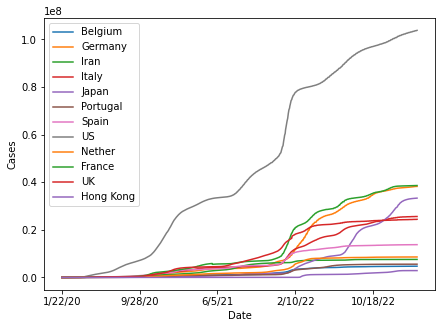

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5)) #, sharey=True


sns.lineplot(data = sel_countries, 
              x= "Date", 
              y="Cases", 
              hue="Country"
             ) 


sns.lineplot(data = nl_nocol, 
              x= "Date", 
              y="Cases", 
             label = "Nether"
             ) 

sns.lineplot(data = france_nocol, 
              x= "Date", 
              y="Cases", 
             label = "France"
             ) 
sns.lineplot(data = uk_nocol, 
              x= "Date", 
              y="Cases", 
             label = "UK"
             ) 
sns.lineplot(data =  hongkong, 
              x= "Date", 
              y="Cases", 
             label = "Hong Kong"
             ) 


ax.set_xticks(range(0, 1143, 250)) 

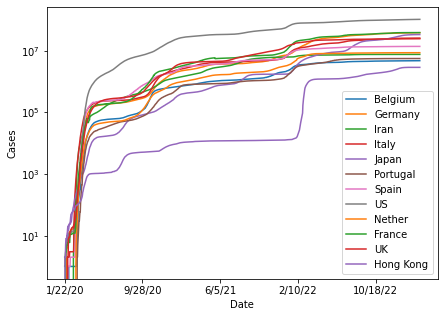

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5)) #, sharey=True


sns.lineplot(data = sel_countries, 
              x= "Date", 
              y="Cases", 
              hue="Country"
             ) 


sns.lineplot(data = nl_nocol, 
              x= "Date", 
              y="Cases", 
             label = "Nether"
             ) 

sns.lineplot(data = france_nocol, 
              x= "Date", 
              y="Cases", 
             label = "France"
             ) 
sns.lineplot(data = uk_nocol, 
              x= "Date", 
              y="Cases", 
             label = "UK"
             ) 
sns.lineplot(data =  hongkong, 
              x= "Date", 
              y="Cases", 
             label = "Hong Kong"
             ) 


ax.set_xticks(range(0, 1143, 250)) 

plt.yscale('log')